In [227]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [228]:
ruta = "CarPrice_Assignment.csv"
df = pd.read_csv(ruta)
df2 = pd.read_csv(ruta)

In [229]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [230]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [231]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

#### Visualización

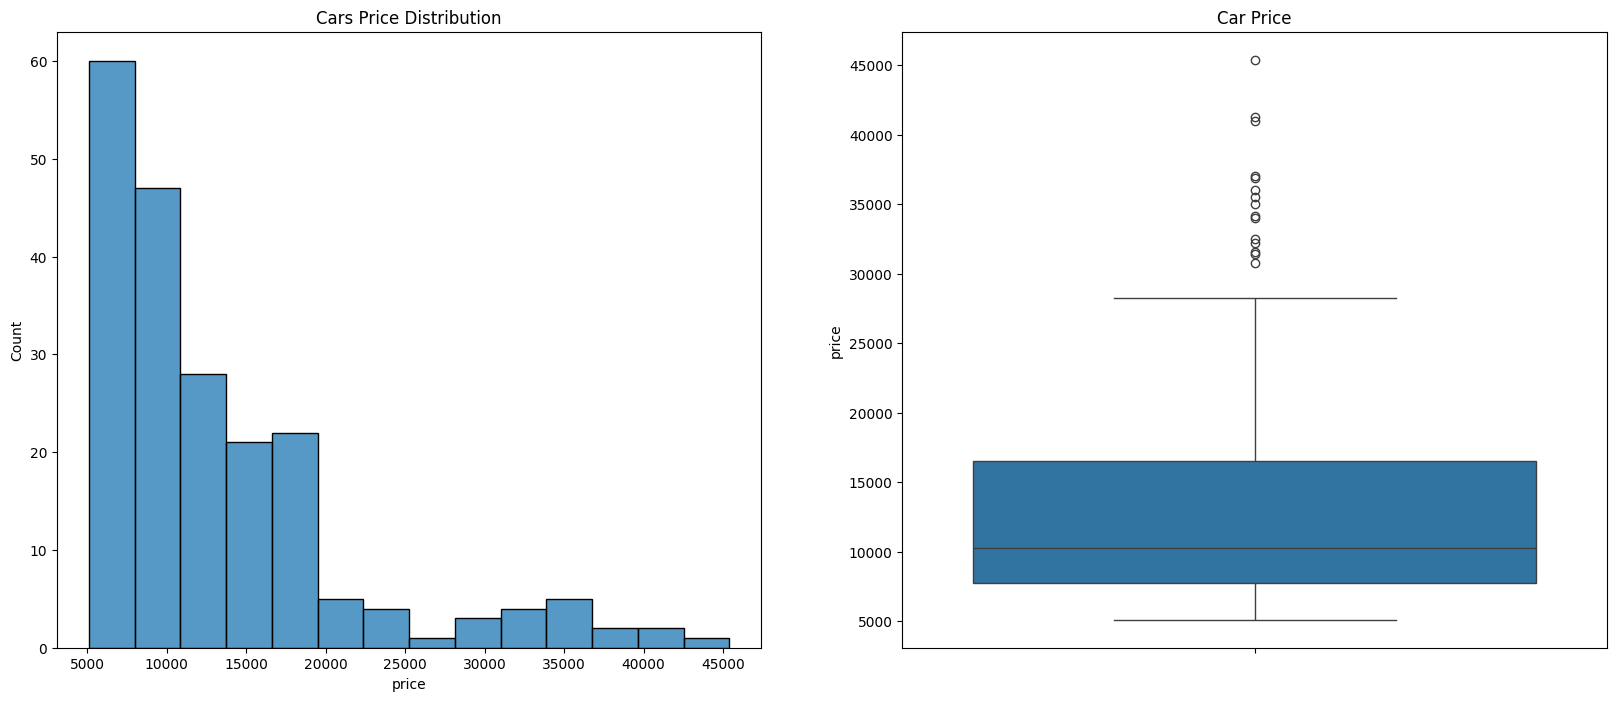

In [232]:
plt.figure( figsize = (20,8))
plt.subplot(1,2,1)
plt.title("Cars Price Distribution")
sns.histplot(df.price)
plt.subplot(1,2,2)
plt.title("Car Price")
sns.boxplot(y = df.price)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14980\1016520809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.symboling, y = df.price, palette=("cubehelix"))


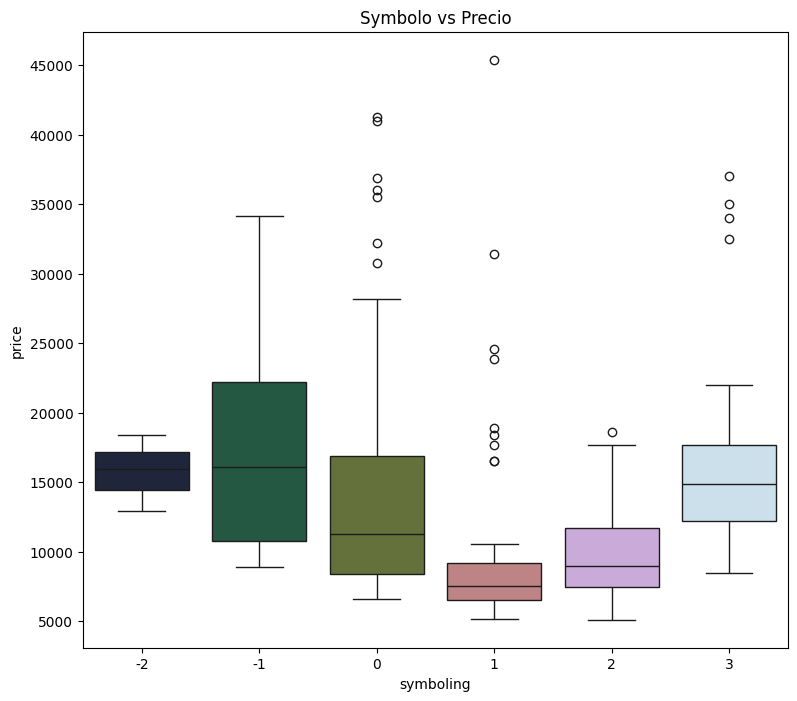

In [233]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title("Symbolo vs Precio")
sns.boxplot(x=df.symboling, y = df.price, palette=("cubehelix"))
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14980\498915893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))


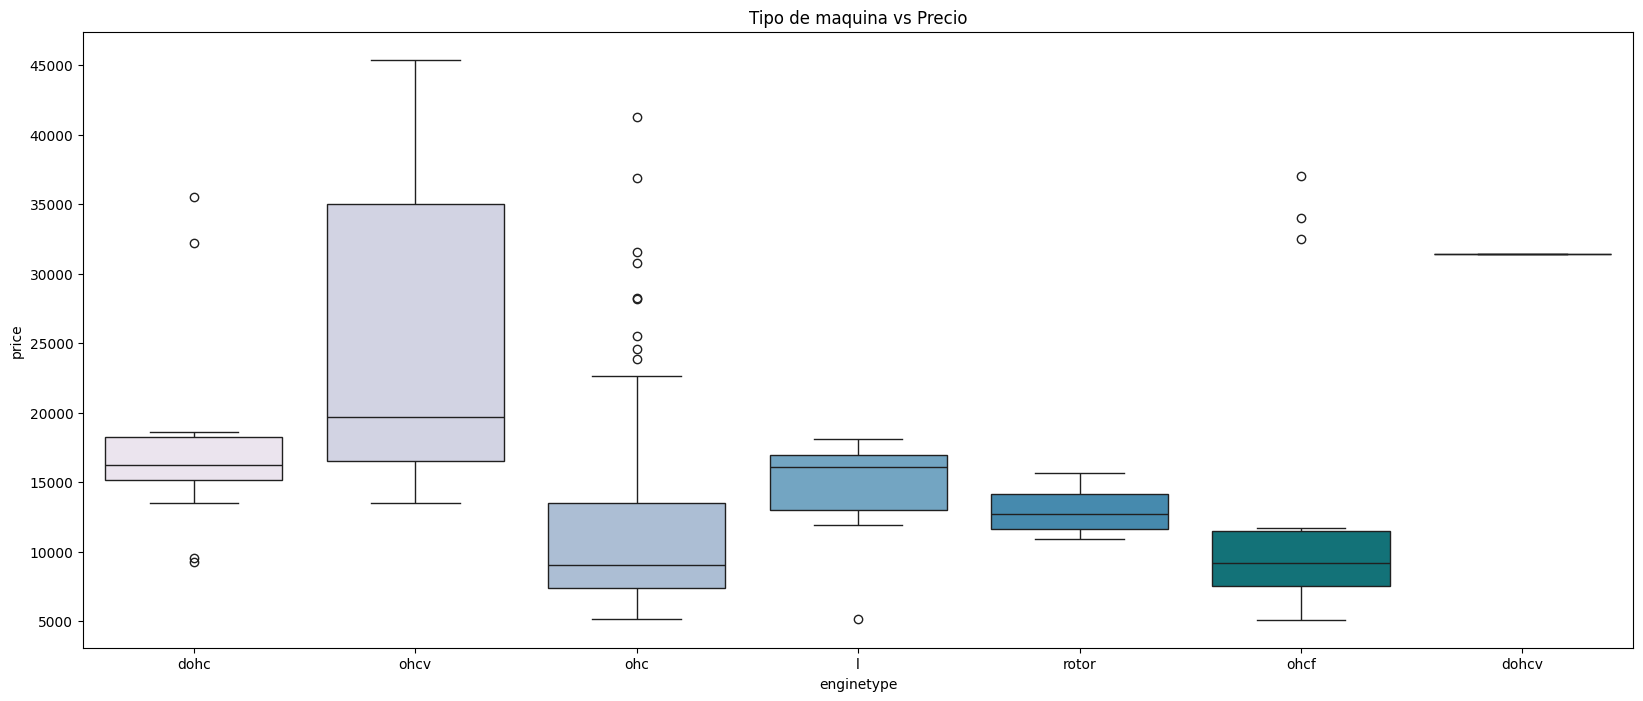

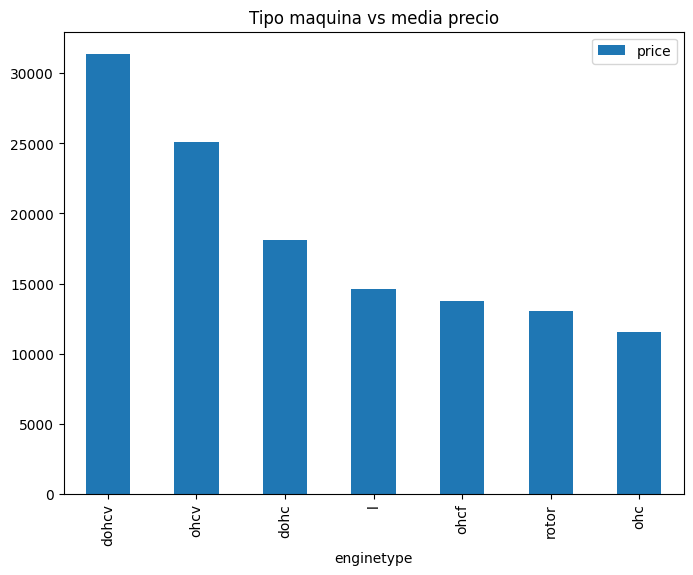

In [234]:
plt.figure(figsize=(20,8))
plt.title("Tipo de maquina vs Precio")
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))
plt.show()
df = pd.DataFrame(df.groupby(["enginetype"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8,6))
plt.title("Tipo maquina vs media precio")
plt.show()

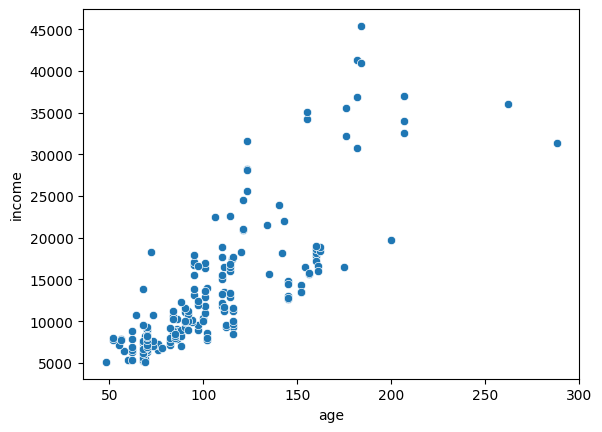

In [235]:
sns.scatterplot(data=df2, x="horsepower", y="price")
plt.xlabel("age")
plt.ylabel("income")
plt.show()

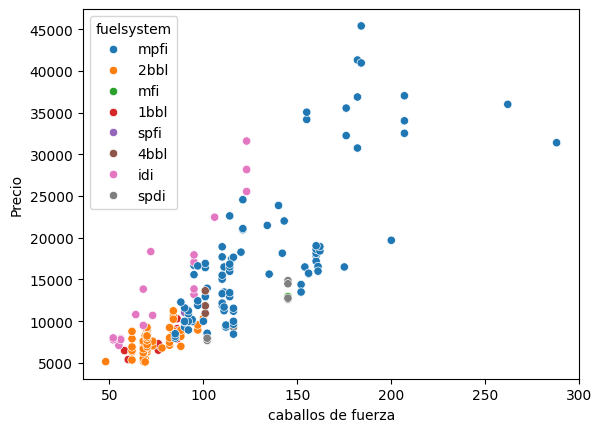

In [236]:
sns.scatterplot(data=df2, x="horsepower", y="price", hue="fuelsystem")
plt.xlabel("caballos de fuerza")
plt.ylabel("Precio")
plt.show()

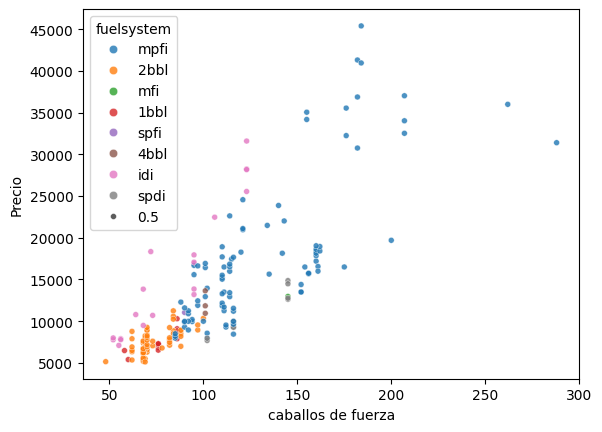

In [237]:
sns.scatterplot(data=df2, x="horsepower", y="price", hue="fuelsystem",
                size=0.5, alpha = 0.8)
plt.xlabel("caballos de fuerza")
plt.ylabel("Precio")
plt.show()

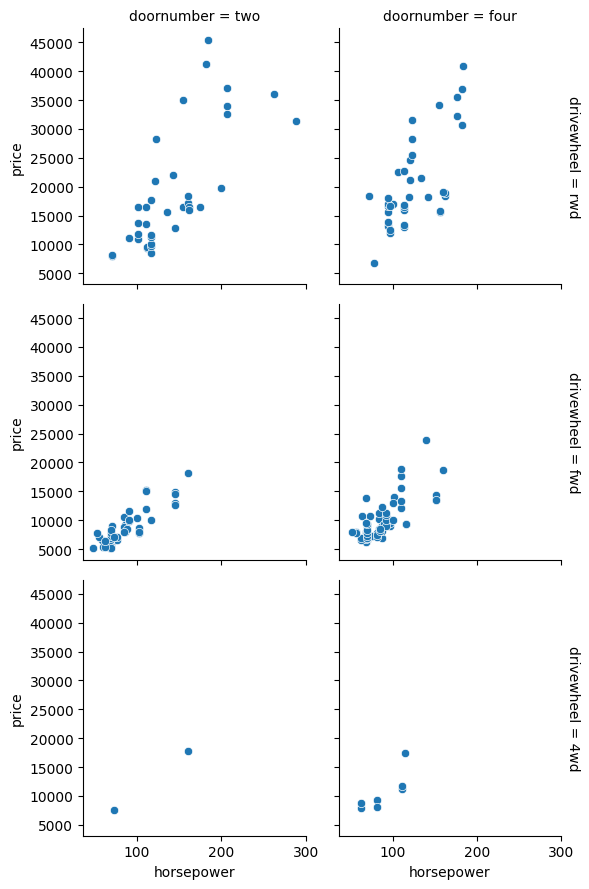

In [238]:
Varios = sns.FacetGrid(df2, row="drivewheel", col="doornumber", margin_titles=True)
Varios.map(sns.scatterplot, "horsepower","price")

## Regresión Lineal

In [239]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [240]:
modelo_autos = linear_model.LinearRegression()

In [241]:
X1 = df2["horsepower"]
y1 = df2["price"]

In [242]:
# se transforman la variable x1 y x2 en matrices bidimencionales
x = X1.values.reshape(-1,1)

y = y1.values.reshape(-1,1)

In [243]:
modelo_autos.fit(x,y)

LinearRegression()

In [244]:
print("Coeficiente B1: ", modelo_autos.coef_[0][0])
print("Termino independiente B0: ", modelo_autos.intercept_[0])
print("y_hat",modelo_autos.coef_[0][0], "X+ ", modelo_autos.intercept_[0])

Coeficiente B1:  163.26306096964797
Termino independiente B0:  -3721.7614943227636
y_hat 163.26306096964797 X+  -3721.7614943227636


In [245]:
#R2 es el coeficiente de determinación indica que tan bien se ajustan los datos al modelo de regración lineal
# varia entre cero y uno entre mas cercano a uno mejor 
valorR2 = modelo_autos.score(x,y)
print(f"El valor de R2 es: {valorR2}")

El valor de R2 es: 0.653088356490231


vamos a ver si se puede mejorar ese r y que este mas cercano a uno
## Regresión con varias variables

In [246]:
from sklearn.model_selection import train_test_split
# esta es la semilla
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size=0.7, test_size=0.3, random_state=100)

In [247]:
# importante para los modelos de regreción siempre se usan enteros o datos de tipo float
# en caso de stren se deben cambiar a variables dommies
y_train = df2_train["price"]
X_train = df2_train[["horsepower", "compressionratio", "wheelbase"]]

In [248]:
modelo_autos_1 = LinearRegression()
modelo_autos_1.fit(X_train, y_train)

LinearRegression()

In [249]:
print("Coeficiente B1: ", modelo_autos_1.coef_[0])
print("Coeficiente B2: ", modelo_autos_1.coef_[1])
print("Coeficiente B3: ", modelo_autos_1.coef_[2])
print("Termino independiente B0: ", modelo_autos_1.intercept_)
# print("y_hat",modelo_autos_1.coef_[0][0], "X+ ", modelo_autos_1.intercept_[0])

Coeficiente B1:  139.90996605739753
Coeficiente B2:  312.50989979469153
Coeficiente B3:  390.51599075371394
Termino independiente B0:  -42908.132216192476


In [250]:
'''Para el caso anterior el R2 se calculo de est manera 
valorR2 = modelo_autos_1.score(x,y)
print(f"El valor de R2 es: {valorR2}")'''
print("El valor de R2 es: ", modelo_autos_1.score(X_train, y_train))

El valor de R2 es:  0.7839998005918478


## Dummies

In [263]:
df2 = pd.DataFrame(df2)


In [264]:
# con esta funcion vamos a calcular las variables categoricas 
def dummies(X, df2):
    # se elimina la columna 
    temp = pd.get_dummies(df2[X],drop_first=True)
    df2 = pd.concat([df2, temp], axis=1)
    df2.drop([X], axis=1, inplace=True)
    return df2

In [265]:
df2 = dummies("fueltype",df2)
df2 = dummies("aspiration",df2)
df2 = dummies("carbody",df2)
df2 = dummies("enginetype",df2)
df2 = dummies("cylindernumber",df2)

In [266]:
df2.head(10)

,car_ID,symboling,CarName,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,two,rwd,front,88.6,168.8,64.1,48.8,...,False,False,False,False,False,True,False,False,False,False
1,2,3,alfa-romero stelvio,two,rwd,front,88.6,168.8,64.1,48.8,...,False,False,False,False,False,True,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,two,rwd,front,94.5,171.2,65.5,52.4,...,False,False,True,False,False,False,True,False,False,False
3,4,2,audi 100 ls,four,fwd,front,99.8,176.6,66.2,54.3,...,True,False,False,False,False,True,False,False,False,False
4,5,2,audi 100ls,four,4wd,front,99.4,176.6,66.4,54.3,...,True,False,False,False,True,False,False,False,False,False
5,6,2,audi fox,two,fwd,front,99.8,177.3,66.3,53.1,...,True,False,False,False,True,False,False,False,False,False
6,7,1,audi 100ls,four,fwd,front,105.8,192.7,71.4,55.7,...,True,False,False,False,True,False,False,False,False,False
7,8,1,audi 5000,four,fwd,front,105.8,192.7,71.4,55.7,...,True,False,False,False,True,False,False,False,False,False
8,9,1,audi 4000,four,fwd,front,105.8,192.7,71.4,55.9,...,True,False,False,False,True,False,False,False,False,False
9,10,0,audi 5000s (diesel),two,4wd,front,99.5,178.2,67.9,52.0,...,True,False,False,False,True,False,False,False,False,False


In [271]:
# incluye solamente las variables numericas 
df2_num = df2.select_dtypes(include = np.number)

In [272]:
df2_train_1, df2_test_1  =train_test_split(df2_num, train_size=0.7, test_size=0.3, random_state=100)

In [273]:
# extremos la variable del precio
y_train_1 = df2_train_1.pop("price")
X_train_1 = df2_train_1

In [281]:
modelo_autos_3 = LinearRegression()
modelo_autos_3.fit(X_train_1,y_train_1)

LinearRegression()

In [282]:
print("El termino independiente es B: ",modelo_autos_3.intercept_)
print("Los coeficientes son \n",modelo_autos_3.coef_)
print("El valor de R2 es: ", modelo_autos_3.score(X_train_1, y_train_1))

El termino independiente es B:  -56847.03829689378
Los coeficientes son 
 [-1.92404307e+01  4.22047549e+02  1.50026823e+02 -5.45409467e+01
  4.92767021e+02  2.37932888e+02  2.90050519e+00  8.28490719e+01
 -1.58447269e+02 -2.63619858e+03  2.40443152e+02  3.94319095e+01
  1.25537862e+00 -1.88955232e+02  1.36829800e+02]
El valor de R2 es:  0.8628454397149201
